<a href="https://colab.research.google.com/github/Olofmeister911/AutoGPT/blob/master/RRT_WITH_OBSTACLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

Goal reached!


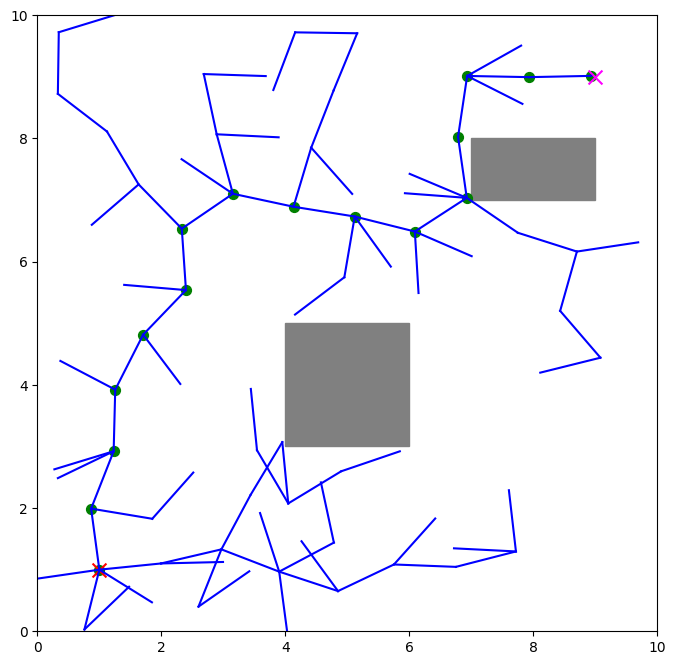

In [7]:
import matplotlib.pyplot as plt
import random
import math

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

    def is_point_inside(self, point):
        return (
            self.x <= point[0] <= self.x + self.width and
            self.y <= point[1] <= self.y + self.height
        )

class RRT:
    def __init__(self, start, goal, width, height, step_size, max_iter, obstacles=[]):
        self.start = Node(start[0], start[1])
        self.goal = Node(goal[0], goal[1])
        self.width = width
        self.height = height
        self.step_size = step_size
        self.max_iter = max_iter
        self.nodes = [self.start]
        self.obstacles = [Obstacle(*obs) for obs in obstacles]

    def generate_random_point(self):
        return Node(random.uniform(0, self.width), random.uniform(0, self.height))

    def nearest_node(self, random_point):
        min_distance = float('inf')
        nearest_node = None

        for node in self.nodes:
            distance = math.dist([node.x, node.y], [random_point.x, random_point.y])
            if distance < min_distance:
               min_distance = distance
               nearest_node = node

        return nearest_node

    def new_node(self, nearest, random_point):
        angle = math.atan2(random_point.y - nearest.y, random_point.x - nearest.x)
        new_x = nearest.x + (self.step_size) * math.cos(angle)
        new_y = nearest.y + (self.step_size) * math.sin(angle)
        return Node(new_x, new_y)

    def is_collision_free(self, node):
        for obstacle in self.obstacles:
            if obstacle.is_point_inside([node.x, node.y]):
                return False
        return True

    def add_node(self, node):
        self.nodes.append(node)

    def plan(self):
        for _ in range(self.max_iter):
            random_point = self.generate_random_point()
            nearest_node = self.nearest_node(random_point)
            new_node = self.new_node(nearest_node, random_point)

            if self.is_collision_free(new_node):
                new_node.parent = nearest_node
                self.add_node(new_node)

                if math.dist([new_node.x, new_node.y], [self.goal.x, self.goal.y]) < 1:
                    print("Goal reached!")
                    return self.extract_path(new_node)

        print("Ran out of iterations. No path found.")
        return []

    def extract_path(self, goal_node):
        path = []
        current_node = goal_node
        while current_node:
            path.append([current_node.x, current_node.y])
            current_node = current_node.parent
        path.reverse()
        return path

    def visualize(self, path=[]):
        plt.figure(figsize=(8, 8))
        for node in self.nodes:
            if node.parent:
                plt.plot([node.x, node.parent.x], [node.y, node.parent.y], color='blue')
        for obstacle in self.obstacles:
            plt.gca().add_patch(plt.Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, color='gray'))
        for point in path:
            plt.scatter(point[0], point[1], color='green', s=50)
        plt.scatter(self.start.x, self.start.y, color='red', marker='x', s=100)
        plt.scatter(self.goal.x, self.goal.y, color='magenta', marker='x', s=100)
        plt.xlim(0, self.width)
        plt.ylim(0, self.height)
        plt.show()

# Example usage:
start = (1, 1)
goal = (9, 9)
width = 10
height = 10
step_size = 1
max_iter = 1000
obstacles = [(4, 3, 2, 2), (7, 7, 2, 1)]  # format: (x, y, width, height)

rrt = RRT(start, goal, width, height, step_size, max_iter, obstacles)
path = rrt.plan()
rrt.visualize(path)
